##  1.Loading Dependencies(Can be ignored)

In [3]:
!pip install tensorflow==2.4.1 tensorflow-io matplotlib mlxtend

^C
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached jax-0.4.30-py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/272.9 MB 4.2 MB/s eta 0:01:05
   ---------------------------------------- 2.1/272

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.2 requires numpy<2.3,>=1.24, but you have numpy 1.23.5 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\audiodata\audiodata\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\user\audiodata\audiodata\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\user\audiodata\audiodata\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\user\AppData\Local\Programs\Python\Python310\lib\ssl.py", line 1130, in read
    r

## 2. Test one audio of each class

In [1]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow_io as tfio

In [2]:
import tensorflow_io as tfio
print(tfio.__version__)

0.17.1


### 2.1 Create path

In [3]:
瑋階梯_file = os.path.join('A瑋鞋','瑋鞋 64.wav')
頻階梯_file = os.path.join('A瑋拖','瑋拖 37.wav')
others  = os.path.join('A襪子','襪子 1.wav')

### 2.2 Read file and resample the rate

In [4]:
def load_wav_16000(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav,axis = -1)                               
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000) #將採樣頻率轉成16000赫茲每秒降低計算量
    return wav

In [5]:
wave = load_wav_16000(瑋階梯_file)
nwave = load_wav_16000(頻階梯_file)
none = load_wav_16000(others)
print(len(none))

82944


In [6]:
print(wave)

tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.9107274e-05 1.3772470e-04
 6.1352075e-05], shape=(101717,), dtype=float32)


### 2.3 Plot the result

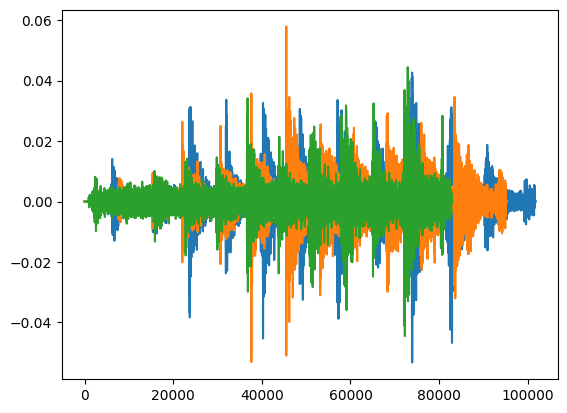

In [7]:
plt.plot(wave)
plt.plot(nwave)
plt.plot(none)
plt.show()

## 3. Prepare the Dataset

### 3.1 Split the data into Train, Validation, Testing Sets(***Just Run Once***)

In [39]:
ALL = os.path.join('ALL')
allf = tf.data.Dataset.list_files(ALL+'\*.wav')
allf.shuffle(buffer_size=2000)
for i in allf.as_numpy_iterator():
    i = i.decode()
    print(i)

ALL\瑋拖 74.wav
ALL\noise_瑋拖 40.wav
ALL\volume_瑋鞋 3.wav
ALL\瑋鞋 37.wav
ALL\媽鞋 81.wav
ALL\媽襪31.wav
ALL\襪子 6.wav
ALL\noise_媽鞋 10.wav
ALL\volume_媽襪 44.wav
ALL\noise_媽襪 96.wav
ALL\volume_襪子 83.wav
ALL\noise_媽襪 47.wav
ALL\noise_媽鞋 70.wav
ALL\媽襪 59.wav
ALL\volume_媽鞋 33.wav
ALL\volume_瑋鞋 79.wav
ALL\volume_瑋鞋 86.wav
ALL\瑋拖 39.wav
ALL\volume_襪子 88.wav
ALL\noise_瑋拖 64.wav
ALL\noise_瑋鞋 32.wav
ALL\noise_瑋鞋 41.wav
ALL\noise_瑋拖 20.wav
ALL\noise_瑋鞋 113.wav
ALL\瑋鞋 48.wav
ALL\volume_媽襪 103.wav
ALL\noise_瑋拖 53.wav
ALL\瑋拖 95.wav
ALL\noise_襪子 119.wav
ALL\volume_瑋拖 104.wav
ALL\noise_媽拖 66.wav
ALL\noise_媽鞋 68.wav
ALL\瑋鞋 86.wav
ALL\noise_瑋拖 104.wav
ALL\noise_瑋鞋 108.wav
ALL\noise_瑋拖 59.wav
ALL\volume_瑋鞋 48.wav
ALL\volume_襪子 42.wav
ALL\volume_媽襪 68.wav
ALL\媽鞋 51.wav
ALL\volume_媽鞋 59.wav
ALL\noise_襪子 60.wav
ALL\瑋拖 54.wav
ALL\volume_媽襪 9.wav
ALL\noise_媽拖 45.wav
ALL\媽襪 77.wav
ALL\volume_媽襪 53.wav
ALL\noise_媽拖 67.wav
ALL\volume_媽鞋 120.wav
ALL\noise_媽鞋 20.wav
ALL\volume_媽拖 107.wav
ALL\媽鞋 57.wav
ALL\媽鞋 31.wav
ALL\volum

In [54]:
# 分割資料集
train_data = allf.take(1170)  # 65%
val_data = allf.skip(1170).take(450)  # 25%
test_data = allf.skip(1620).take(180)  # 10%

def folder_not_empty(path):
    """檢查資料夾是否存在且不為空"""
    return os.path.exists(path) and os.listdir(path)
def copy_dataset(dataset, target_root):
    for ele in dataset.as_numpy_iterator():
        file_path = ele.decode()  # 避免中文路徑出錯
        export_path = target_root + file_path[3:]  # 忽略 "ALL"

        # 建立目標資料夾
        os.makedirs(os.path.dirname(export_path), exist_ok=True)

        # 如果檔案不存在才複製
        if not tf.io.gfile.exists(export_path):
            tf.io.gfile.copy(file_path, export_path)
            print(f"Successfully copy {file_path} to {export_path}")

# 檢查三個資料夾是否都不為空
if folder_not_empty("train_data") or folder_not_empty("val_data") or folder_not_empty("test_data"):
    print("有至少一個資料夾已有內容，跳過複製。")
else:
    print("開始複製檔案...")
    copy_dataset(train_data, "train_data")
    copy_dataset(val_data, "val_data")
    copy_dataset(test_data, "test_data")

有至少一個資料夾已有內容，跳過複製。


### 3.2 One hot label the data(可改良)

In [96]:
TRAIN = tf.data.Dataset.list_files("train_data"+'\*.wav')
VAL = tf.data.Dataset.list_files("val_data"+'\*.wav')
TEST = tf.data.Dataset.list_files("test_data"+'\*.wav')

In [98]:
AUTOTUNE = tf.data.AUTOTUNE

# 六類關鍵字（需能在路徑中唯一命中其中一個）
CLASSES = ["瑋鞋","瑋拖","襪子","媽鞋","媽拖","媽襪"]
NUM_CLASSES = len(CLASSES)

#@tf.function
# 用 regex_full_match 實作「包含」
def label_from_path(path: tf.Tensor) -> tf.Tensor:
    # 為每個關鍵字做樣式：".*關鍵字.*"
    patterns = [tf.strings.join([".*", kw, ".*"]) for kw in CLASSES]
    # 逐一比對（回傳 bool）
    matches = [tf.strings.regex_full_match(path, pat) for pat in patterns]  # list of tf.bool
    hits = tf.stack(matches)                                                # [6] bool
    hits_i = tf.cast(hits, tf.int32)

    # 防呆：確保只命中一個類別
    tf.debugging.assert_equal(tf.reduce_sum(hits_i), 1,
        message="路徑未能唯一對應到一個類別；請檢查關鍵字或檔名/資料夾命名。")

    return tf.argmax(hits_i)  # int32 類別 id

def attach_label(path: tf.Tensor):
    y = tf.one_hot(label_from_path(path), depth=NUM_CLASSES)
    return path, y

# 你的 TRAIN/VAL/TEST 目前是「只有路徑」的 Dataset
# 先在同一條 pipeline 把路徑配標籤，再交給你原本的 preprocess_batched
TRAIN = TRAIN.map(attach_label, num_parallel_calls=AUTOTUNE)
VAL   = VAL.map(attach_label,   num_parallel_calls=AUTOTUNE)
TEST  = TEST.map(attach_label,  num_parallel_calls=AUTOTUNE)

In [100]:
# 小檢查
for xb, yb in TRAIN.take(1):
    print(xb.shape, yb)   # 例如 (32, T, F, 1), (32, 6)

() tf.Tensor([0. 1. 0. 0. 0. 0.], shape=(6,), dtype=float32)


### 3.2 Find the best length (Used in 4.)


In [58]:
file_path = ['A瑋鞋','A瑋拖','A襪子','A媽鞋','A媽拖','A媽襪']
all_length = []
for i in range(len(file_path)):
    temp_length = []
    for file in os.listdir(os.path.join(file_path[i])):
        if file.endswith(".wav"):
            tensor_wave = load_wav_16000(os.path.join(file_path[i], file))
            temp_length.append(len(tensor_wave))
    all_length.append(temp_length)

In [59]:
for lengths in all_length:
    print(lengths)

[91136, 93525, 85674, 81920, 105813, 101034, 103765, 95573, 101034, 99328, 95914, 99669, 95914, 96938, 95573, 94208, 96938, 111957, 107178, 105130, 100352, 97962, 109568, 89088, 108544, 87381, 95573, 87381, 86357, 97962, 93184, 94549, 100010, 96938, 100693, 109226, 106154, 95573, 96938, 103765, 98304, 102741, 106154, 91818, 105472, 96597, 95914, 102058, 99328, 96256, 95573, 94208, 93525, 93525, 90112, 97621, 103082, 104789, 96256, 96256, 94890, 96938, 97280, 94890, 106496, 91818, 97962, 95573, 98986, 92842, 104789, 92842, 98645, 104448, 101034, 99669, 94549, 104106, 88746, 100352, 101376, 101717, 90112, 96256, 97280, 87040, 85674, 88746, 90453, 98986, 92160, 94890, 100693, 92842, 102400, 96938, 93525, 88064, 83968, 88405, 96256, 92160, 84650, 96938, 95232, 91477, 89770, 85333, 87040, 97621, 94890, 102058, 106154, 89770, 87722, 90794, 96938, 86698, 87040, 99669, 91136, 93525, 85674, 81920, 105813, 101034, 103765, 95573, 101034, 99328, 95914, 99669, 95914, 96938, 95573, 94208, 96938, 111

In [60]:
tf.math.reduce_mean(all_length[0])
#tf.math.reduce_min(all_length[0])
#tf.math.reduce_max(all_length[0])

<tf.Tensor: shape=(), dtype=int32, numpy=96408>

In [75]:
tf.math.reduce_mean(all_length[1])
#tf.math.reduce_min(all_length[1])
#tf.math.reduce_max(all_length[1])

<tf.Tensor: shape=(), dtype=int32, numpy=98076>

In [62]:
tf.math.reduce_mean(all_length[2])
#tf.math.reduce_min(all_length[2])
#tf.math.reduce_max(all_length[2])

<tf.Tensor: shape=(), dtype=int32, numpy=91495>

## 4. Data preprocessing

### 4.1 Build the stft function

In [101]:
def preprocess(file_path, label): 
    wav = load_wav_16000(file_path)
    wav = wav[:90000]
    zero_padding = tf.zeros([90000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32) #frame_length窗口長度,frame_step步長
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label 

### 4.2 Showing the spectrogram of one of the classes

In [102]:
filepath, label = TRAIN.as_numpy_iterator().next()

In [103]:
spectrogram, label = preprocess(filepath, label)
spectrogram.shape

TensorShape([2803, 257, 1])

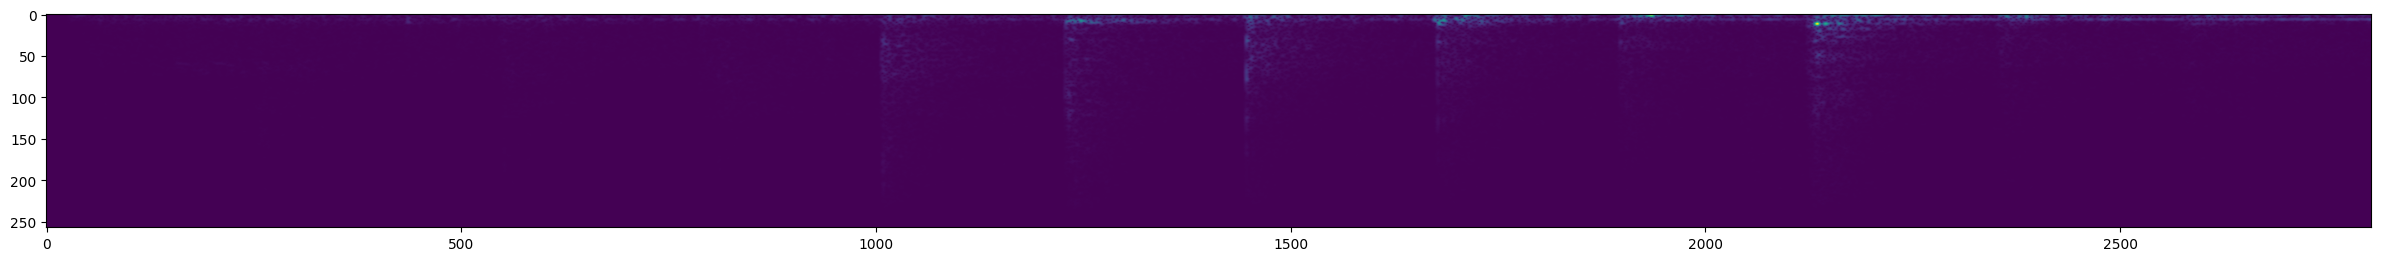

In [104]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### 4.3 Preprocess all data 

In [105]:
def preprocess_batched(dataset, batch_size=32, prefetch=16):
    dataset = dataset.map(preprocess)
    dataset = dataset.cache()
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(prefetch)
    return dataset

In [106]:
TRAIN = preprocess_batched(TRAIN)
VAL = preprocess_batched(VAL)
TEST = preprocess_batched(TEST)

In [107]:
samples, labels = TRAIN.as_numpy_iterator().next()

In [108]:
samples.shape #confirm the shape of each batch

(32, 2803, 257, 1)

## 5. Build and compile the model

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D,Dropout

In [110]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(2803, 257,1)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax')) #這裡要改成softmax，前面的數字對應class的數量

In [111]:
#loss 改成categorical_crossentropy，其他大致一樣
model.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 2801, 255, 16)     160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1400, 127, 16)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1398, 125, 16)     2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 699, 62, 16)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 693408)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               88756352  
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

## 6. Train the model

In [113]:
hist = model.fit(TRAIN, epochs=8, validation_data=VAL)

Epoch 1/8
37/37 [==============================] - 222s 6s/step - loss: 2.7987 - accuracy: 0.3912 - val_loss: 0.2313 - val_accuracy: 0.9311
Epoch 2/8
37/37 [==============================] - 196s 5s/step - loss: 0.2106 - accuracy: 0.9319 - val_loss: 0.1034 - val_accuracy: 0.9644
Epoch 3/8
37/37 [==============================] - 194s 5s/step - loss: 0.0836 - accuracy: 0.9707 - val_loss: 0.2064 - val_accuracy: 0.9133
Epoch 4/8
37/37 [==============================] - 204s 6s/step - loss: 0.0873 - accuracy: 0.9603 - val_loss: 0.0690 - val_accuracy: 0.9733
Epoch 5/8
37/37 [==============================] - 199s 5s/step - loss: 0.0361 - accuracy: 0.9858 - val_loss: 0.0617 - val_accuracy: 0.9756
Epoch 6/8
37/37 [==============================] - 204s 5s/step - loss: 0.0186 - accuracy: 0.9973 - val_loss: 0.0323 - val_accuracy: 0.9844
Epoch 7/8
37/37 [==============================] - 199s 5s/step - loss: 0.0150 - accuracy: 0.9972 - val_loss: 0.0240 - val_accuracy: 0.9933
Epoch 8/8
37/37 [===

## 7. Check result

In [114]:
hist.history

{'loss': [1.567013144493103,
  0.1853187382221222,
  0.08829005807638168,
  0.061449479311704636,
  0.03232847526669502,
  0.018099995329976082,
  0.015642348676919937,
  0.006748727057129145],
 'accuracy': [0.5948718190193176,
  0.9367521405220032,
  0.9692307710647583,
  0.9777777791023254,
  0.9888888597488403,
  0.9982905983924866,
  0.9974358677864075,
  0.9991452693939209],
 'val_loss': [0.23131966590881348,
  0.1033603847026825,
  0.20640777051448822,
  0.06895942986011505,
  0.06173236295580864,
  0.032320600003004074,
  0.024044094607234,
  0.028013357892632484],
 'val_accuracy': [0.9311110973358154,
  0.9644444584846497,
  0.9133333563804626,
  0.9733333587646484,
  0.9755555391311646,
  0.9844444394111633,
  0.9933333396911621,
  0.9933333396911621]}

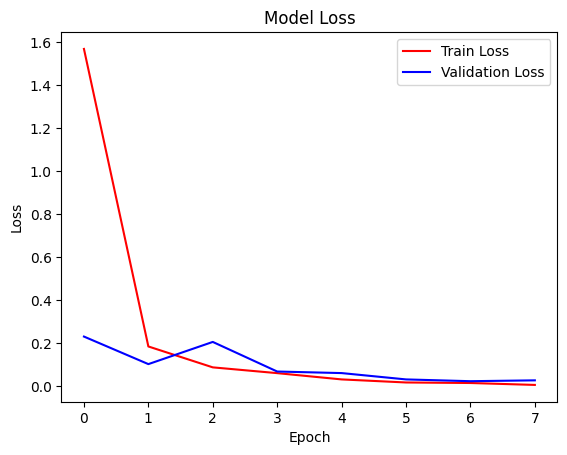

In [115]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss','Validation Loss'], loc='upper right')
plt.show()

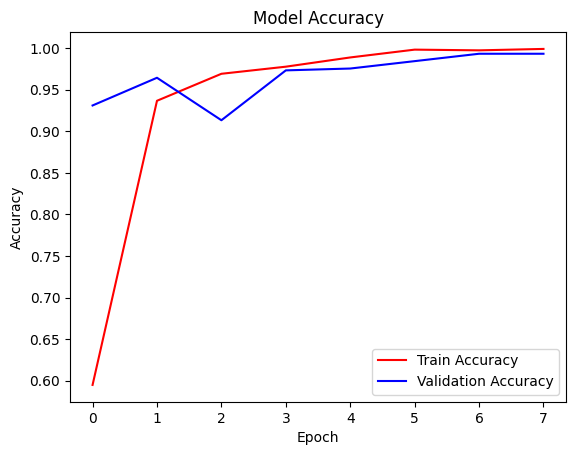

In [116]:
plt.title('Precision')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Validation Accuracy'], loc='lower right')
plt.show()

## 8. Evaluate the model

In [117]:
x_TEST, y_TEST = TEST.as_numpy_iterator().next()

In [118]:
x_TEST.shape

(32, 2803, 257, 1)

In [119]:
#察看結果
test_loss, test_acc,= model.evaluate(x_TEST,  y_TEST, verbose=2)

1/1 - 1s - loss: 0.0082 - accuracy: 1.0000


In [120]:
import numpy as np
y_pred = model.predict(x_TEST)
print(np.argmax(y_pred,axis=1))
print(y_TEST)

[4 2 3 1 5 0 5 2 0 3 1 4 5 2 0 0 4 0 4 3 0 4 3 0 5 1 5 1 0 3 2 3]
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


## 9. Print the Confusion Matrix of Test Set and Train Set

### 9.1 Validation Set

In [121]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

In [122]:
x_validation, y_validation = [], []
for x, y in VAL: 
    x_validation.append(x.numpy())
    y_validation.append(y.numpy())
x_validation = np.concatenate(x_validation)
y_validation = np.concatenate(y_validation)

y_predval = np.argmax(model.predict(x_validation), axis=1)
y_validation = np.argmax(y_validation, axis=1)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

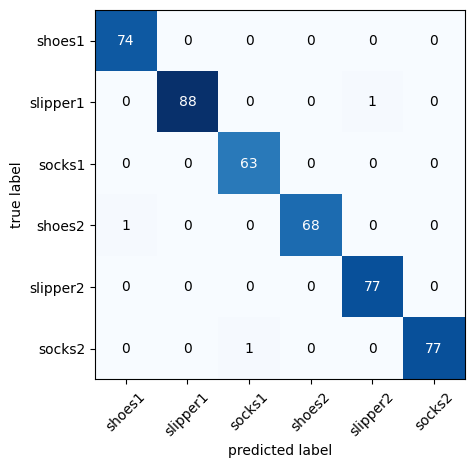

In [123]:
class_names = ['shoes1','slipper1','socks1','shoes2','slipper2','socks2',]
mat_val = confusion_matrix(y_predval, y_validation)
plot_confusion_matrix(conf_mat=mat_val,class_names = class_names)

### 9.2 Test Set

In [124]:
x_test, y_test = [], []
for x, y in TEST: 
    x_test.append(x.numpy())
    y_test.append(y.numpy())
x_test = np.concatenate(x_test)
y_test = np.concatenate(y_test)

y_predtt = np.argmax(model.predict(x_test), axis=1)
y_test = np.argmax(y_test, axis=1)

In [125]:
y_test
y_predtt

array([4, 0, 4, 3, 3, 5, 1, 2, 1, 5, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 1, 5,
       0, 5, 0, 4, 5, 3, 1, 2, 4, 5, 5, 1, 5, 1, 3, 0, 5, 1, 3, 4, 3, 3,
       2, 1, 4, 0, 3, 2, 1, 4, 5, 4, 3, 3, 2, 1, 4, 2, 3, 1, 1, 2, 2, 2,
       4, 2, 2, 1, 4, 5, 2, 3, 0, 3, 4, 2, 2, 4, 5, 5, 5, 4, 2, 0, 5, 3,
       0, 2, 3, 0, 0, 1, 4, 0, 4, 5, 4, 2, 4, 3, 2, 5, 1, 0, 3, 3, 0, 2,
       0, 4, 4, 4, 3, 2, 2, 2, 2, 0, 5, 1, 5, 5, 3, 1, 2, 2, 5, 5, 2, 1,
       5, 1, 5, 5, 0, 0, 5, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 3, 4, 1, 1,
       1, 1, 5, 1, 0, 0, 0, 5, 1, 4, 0, 0, 4, 2, 4, 4, 2, 3, 5, 4, 5, 0,
       0, 5, 0, 3], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

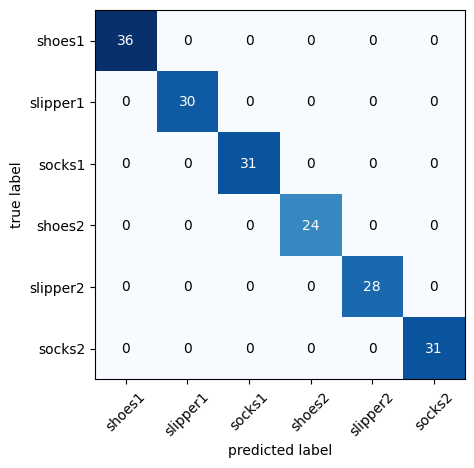

In [126]:
mat_test = confusion_matrix(y_test, y_predtt)
plot_confusion_matrix(conf_mat=mat_test,class_names = class_names)
#plt.figure()
#plt.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title('Confusion Matrix')
#plt.colorbar()
#plt.tight_layout()
#plt.ylabel('True label')
#plt.xlabel('Predicted label')
#plt.show()

## 10. Save the Model

In [130]:
model.save('./multiclass_audio_model_20250813.h5')  #名字可調整
del model

## 11. Import the model and make prediction

In [132]:
myModel = tf.keras.models.load_model('./(F全5T)multiclass_audio_model.h5', compile=False)

In [133]:
result = {}
test_file, label = preprocess(os.path.join('A瑋','瑋拖 67.wav'), 1)
test_file = tf.expand_dims(test_file, 0)
test_file.shape
rhat = myModel.predict(test_file)
#rhat = [1 if prediction > 0.5 else 0 for prediction in rhat]
result['瑋 67.wav'] = rhat

In [134]:
print(result)

{'瑋 67.wav': array([[4.5530288e-03, 9.9233234e-01, 9.3384173e-05, 1.2668620e-03,
        1.5979601e-03, 1.5653529e-04]], dtype=float32)}
